In [1]:
import os
import numpy as np
import netCDF4
import datetime
import logging
import cmocean
import calendar
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import sdcclimatologies

In [2]:
from importlib import reload
reload(sdcclimatologies)

<module 'sdcclimatologies' from '/home/ctroupin/Projects/SeaDataCloud/Python/sdcclimatologies.py'>

In [3]:
logger = logging.getLogger("Monthly-Plots")
logger.setLevel(logging.INFO)
logging.info("Starting")

## Files and directories

In [4]:
wod_annual_T = sdcclimatologies.get_WOA_url("temperature", 0)
wod_annual_S = sdcclimatologies.get_WOA_url("salinity", 0)

sdcdir = "../Julia/Climatologies/NorthSea/output/"
sdc_monthly_T = os.path.join(sdcdir, "Water_body_Temperature_NorthSea.4Danl_monthly_merged.nc")
sdc_monthly_S = os.path.join(sdcdir, "Water_body_Salinity_NorthSea.4Danl_monthly_merged.nc")

figdir = "/home/ctroupin/dox/DIVAnd-data/NorthSea/figures/WOA/monthly/"
figdir2 = "/home/ctroupin/dox/DIVAnd-data/NorthSea/figures/SDC/monthly/"
if not os.path.exists(figdir):
    os.makedirs(figdir)
if not os.path.exists(figdir2):
    os.makedirs(figdir2)

## Load coordinates from WOA

In [5]:
lonWOA, latWOA, depthWOA, timeWOA, timeWOAunits = \
sdcclimatologies.get_WOA_coords(wod_annual_T)

## Select the fields for the region of interest
Load the coordinates from the SDN product and find the good WOA coordinates.

In [6]:
lonmin, lonmax, latmin, latmax, dmin, dmax, datemin, datemax = \
sdcclimatologies.get_SDN_domain(sdc_monthly_S)

In [7]:
goodlon = (lonWOA >= lonmin - 1.) & (lonWOA <= lonmax + 1.)
goodlat = (latWOA >= latmin - 1.) & (latWOA <= latmax + 1.)
gooddepth = (depthWOA >= dmin) & (depthWOA <= dmax)
lonWOA = lonWOA[goodlon]
latWOA = latWOA[goodlat]
depthWOA = depthWOA[gooddepth]

## Make the plots
### Define projection

In [8]:
m = Basemap(projection='merc',llcrnrlat=latmin, urcrnrlat=latmax,
            llcrnrlon=lonmin, urcrnrlon=lonmax, lat_ts=0.5*(latmin+latmax), resolution='i')

### Temperature WOA

In [87]:
varname = "temperature"
depth2plot = 0.0 
depthindex = np.where(depthWOA == depth2plot)[0]

fig = plt.figure(figsize=(9, 9))

# Loop on the months
for months in range(0, 12):
    
    # Create file URL
    wod_month_T = sdcclimatologies.get_WOA_url("temperature", months+1)
    
    # Load the monthly data 
    with netCDF4.Dataset(wod_month_T) as nc:
        T_WOA = nc.variables["t_an"][0, depthindex, goodlat, goodlon].squeeze()

    # fname = "WOA_{}_annual_{}m".format(varname, str(int(depth)).zfill(3))
    # figname = os.path.join(figdir, fname)
    
    ax = plt.subplot(4, 3, months+1)
    
    periodname = sdcclimatologies.get_WOA_period(months + 1)
    
    sdcclimatologies.make_2D_subplot(m, lonWOA, latWOA, T_WOA, varname=varname,
                depth=depth2plot, product="WOA monthly", period=periodname, 
                figname=None, vmin=5., vmax=17., nsubplot=months+1)

fig.suptitle("WOA monthly {} at {} m".format(varname, int(depth2plot))) 
fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.15, 0.035, 0.7])
cb = plt.colorbar(cax=cbar_ax, extend="both")
cb.set_label("T ($^{\circ}$C)", rotation=0, ha="left", fontsize=14)
figname = "WOA_monthly_{}_{}".format(varname, int(depth2plot))

plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
plt.close()
logger.info("Figures saved in {}".format(figdir))

INFO:Monthly-Plots:Figures saved in /home/ctroupin/dox/DIVAnd-data/NorthSea/figures/WOA/monthly/


### Salinity WOA

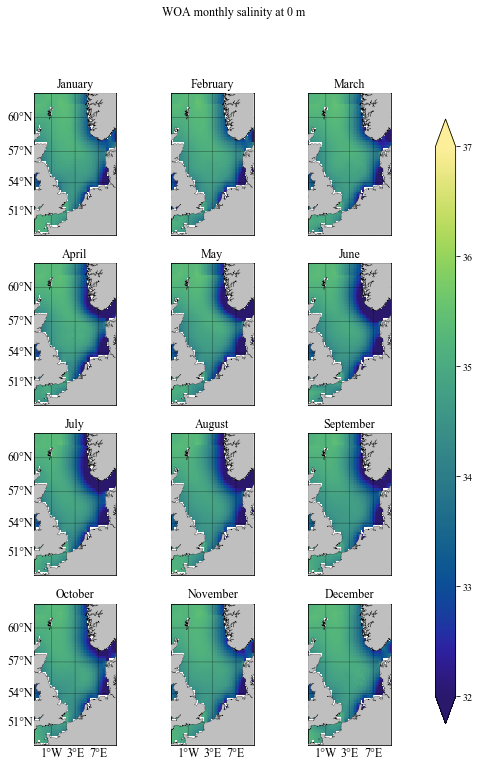

INFO:Monthly-Plots:Figures saved in ../figures/WOA/monthly/


In [15]:
varname = "salinity"
depth2plot = 0.0 
depthindex = np.where(depthWOA == depth2plot)[0]

fig = plt.figure(figsize=(9, 12))

# Loop on the months
for months in range(0, 12):
    
    # Create file URL
    wod_month_S = sdcclimatologies.get_WOA_url("salinity", months+1)
    
    # Load the monthly data 
    with netCDF4.Dataset(wod_month_S) as nc:
        S_WOA = nc.variables["s_an"][0, depthindex, goodlat, goodlon].squeeze()

    # fname = "WOA_{}_annual_{}m".format(varname, str(int(depth)).zfill(3))
    # figname = os.path.join(figdir, fname)
    
    ax = plt.subplot(4, 3, months+1)
    
    periodname = sdcclimatologies.get_WOA_period(months + 1)
    
    sdcclimatologies.make_2D_subplot(m, lonWOA, latWOA, S_WOA, varname=varname,
                depth=depth2plot, product="WOA monthly", period=periodname, 
                figname=None, vmin=32., vmax=37., nsubplot=months+1)
    

fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.15, 0.035, 0.7])
plt.colorbar(cax=cbar_ax, extend="both")    
fig.suptitle("WOA monthly {} at {} m".format(varname, int(depth2plot))) 
figname = "WOA_monthly_{}_{}".format(varname, int(depth2plot))
plt.savefig(os.path.join(figdir, figname), dpi=300, bbox_inches="tight")
# plt.show()
plt.close()
logger.info("Figures saved in {}".format(figdir))

### Temperature SDC
Load the monthly field

In [11]:
lonSDC, latSDC, depthSDC, datesSDC, T_SDC = \
sdcclimatologies.read_climato_sdc(sdc_monthly_T, "temperature")
T_SDC.shape

(12, 41, 109, 113)

In [12]:
varname = "temperature"
depth2plot = 0.0 
depthindex = np.where(depthSDC == depth2plot)[0]
T_SDC_depth = T_SDC[:,depthindex,:,:].squeeze()

fig = plt.figure(figsize=(9, 12))

# Loop on the months
for months in range(0, 12):
    
    ax = plt.subplot(4, 3, months+1)
    
    periodname = sdcclimatologies.get_WOA_period(months + 1)
    
    sdcclimatologies.make_2D_subplot(m, lonSDC, latSDC, T_SDC_depth[months,:,:], 
                                     varname=varname, depth=depth2plot, 
                                     product="SDC monthly", period=periodname, 
                                     figname=None, vmin=5., vmax=17., 
                                     nsubplot=months+1)
    
    
fig.suptitle("SDC monthly {} at {} m".format(varname, int(depth2plot))) 
fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.15, 0.035, 0.7])
cb = plt.colorbar(cax=cbar_ax, extend="both")
cb.set_label("T ($^{\circ}$C)", rotation=0, ha="left", fontsize=14)

figname = "SDC_monthly_{}_{}_nocoeff".format(varname, int(depth2plot))
plt.savefig(os.path.join(figdir2, figname), dpi=300, bbox_inches="tight")
#plt.show()
plt.close()
logger.info("Figures saved in {}".format(figdir2))

INFO:Monthly-Plots:Figures saved in /home/ctroupin/dox/DIVAnd-data/NorthSea/figures/SDC/monthly/


### Salinity SDC

In [9]:
lonSDC, latSDC, depthSDC, datesSDC, S_SDC = \
sdcclimatologies.read_climato_sdc(sdc_monthly_S, "salinity")

In [10]:
varname = "salinity"
depth2plot = 0.0 
depthindex = np.where(depthSDC == depth2plot)[0]
S_SDC_depth = S_SDC[:,depthindex,:,:].squeeze()

fig = plt.figure(figsize=(9, 12))

# Loop on the months
for months in range(0, 12):
    
    ax = plt.subplot(4, 3, months+1)
    
    periodname = sdcclimatologies.get_WOA_period(months + 1)
    
    sdcclimatologies.make_2D_subplot(m, lonSDC, latSDC, S_SDC_depth[months,:,:], 
                                     varname=varname, depth=depth2plot, 
                                     product="SDC monthly", period=periodname, 
                                     figname=None, vmin=30., vmax=36., 
                                     nsubplot=months+1)
    
    
fig.suptitle("SDC monthly {} at {} m".format(varname, int(depth2plot))) 
fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.15, 0.035, 0.7])
cb = plt.colorbar(cax=cbar_ax, extend="both")
cb.set_label("T ($^{\circ}$C)", rotation=0, ha="left", fontsize=14)

figname = "SDC_monthly_{}_{}_nocoeff".format(varname, int(depth2plot))
plt.savefig(os.path.join(figdir2, figname), dpi=300, bbox_inches="tight")
#plt.show()
plt.close()
logger.info("Figures saved in {}".format(figdir2))

INFO:Monthly-Plots:Figures saved in /home/ctroupin/dox/DIVAnd-data/NorthSea/figures/SDC/monthly/
